# 单层网络模型

本小节主要介绍单层神经网络模型的设计，使用单层网络构建训练网络作为讲解实例。


## 1.实验目的
- 了解单层网络模型的基本原理。
- 掌握如何使用MindSpore构造单层神经网络模型。
- 需要使用鸢尾花数据集，构建单层网络模型实现对其分类。

## 2.模型介绍
人工神经网络（artificial neural network，ANN），简称神经网络（neural network，NN），是一种模仿生物神经网络的结构和功能的数学模型或计算模型。神经网络由大量的人工神经元联结进行计算。大多数情况下人工神经网络能在外界信息的基础上改变内部结构，是一种自适应系统，由大量的节点（或称“神经元”）和之间相互的联接构成。每个节点代表一种特定的输出函数，称为激活函数（activation function）。每两个节点间的联接都代表一个对于通过该连接信号的加权值，称之为权重，这相当于人工神经网络的记忆。网络的输出则依网络的连接方式，权重值和激励函数的不同而不同。

一个单层神经网络，可以看做一个函数，它将一个或多个输入$x$映射为输出$y$，训练依据是找到一组感知器的权重，使得这组感知器的输出与期望输出之间的误差最小。如下图所示。
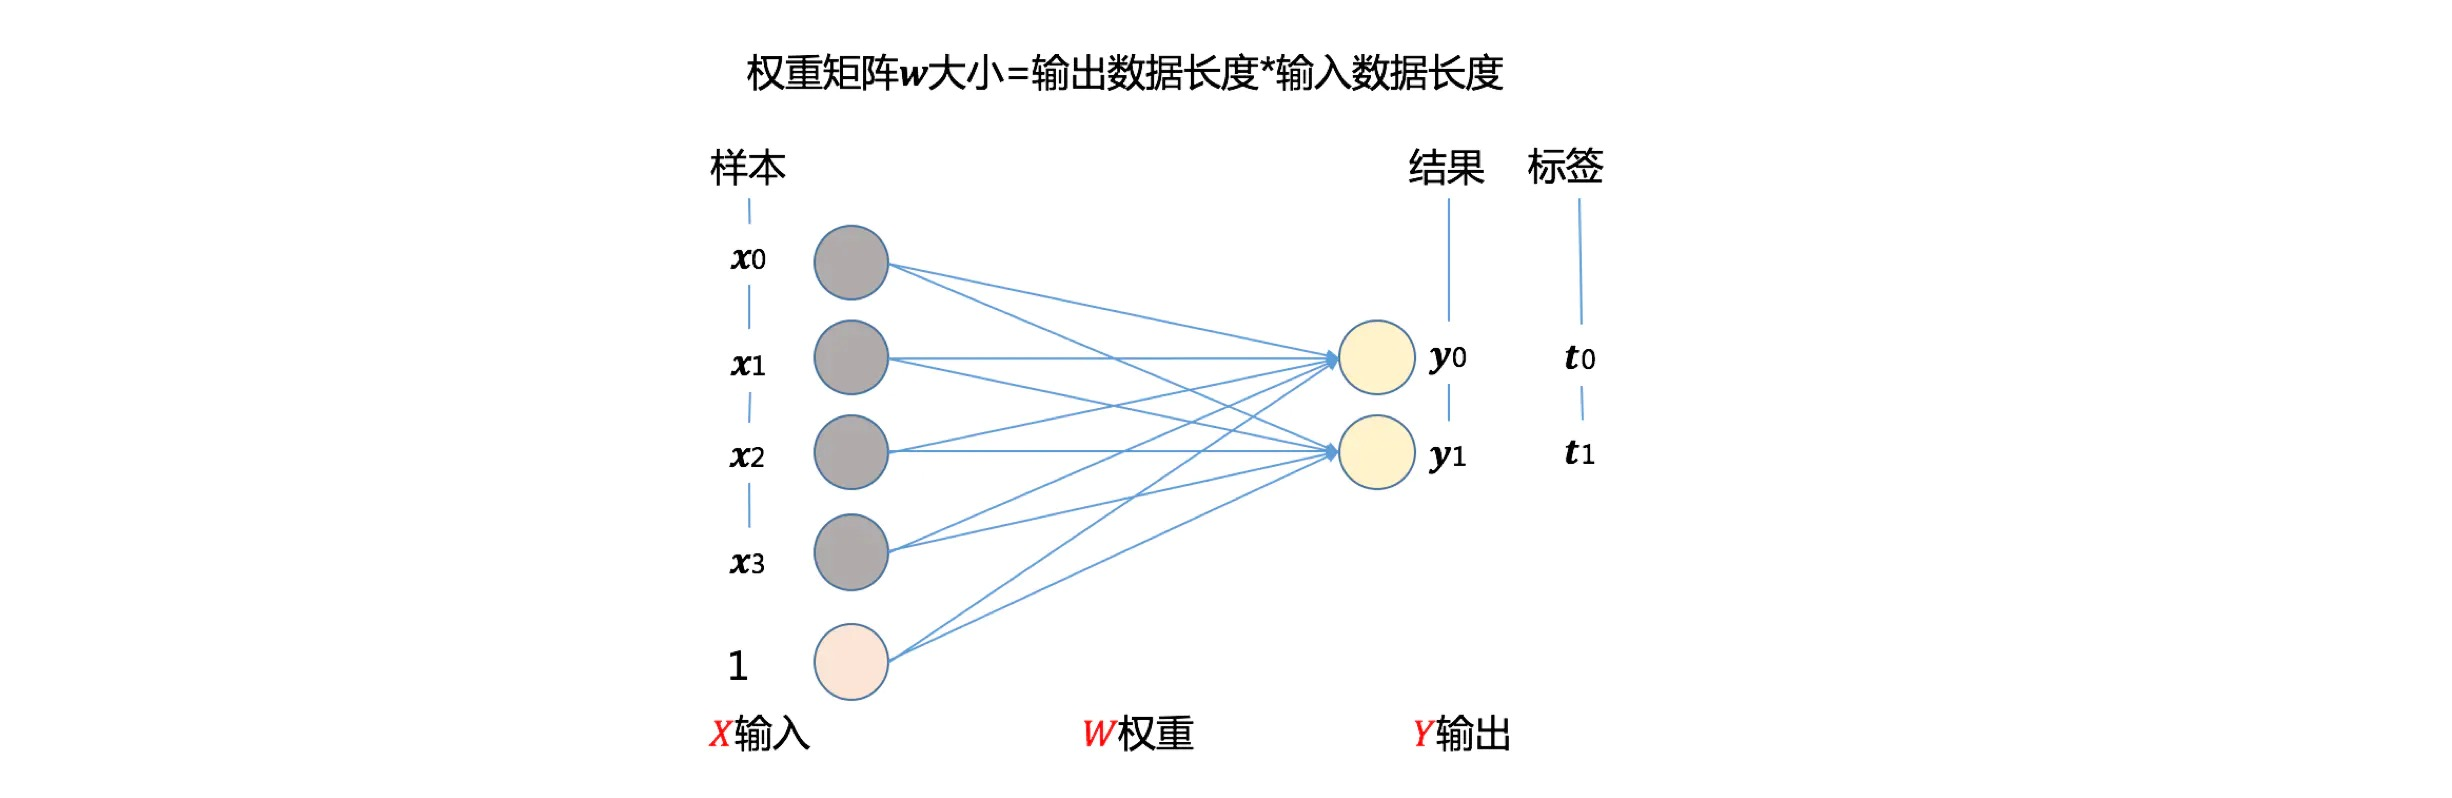
其中数据表示如下：<br>
1.输入向量$ \textbf{X} = [x_0, x_1, ..., x_n] $<br>
2.输出向量$ \textbf{Y} = [y_0, y_1, ..., y_m] $<br>
3.权重矩阵$ \textbf{W} = \begin{equation}
	\begin{gathered}
	\begin{bmatrix}
    w_{00} & w_{01} & ... & w_{0n} \\ 
    w_{10} & w_{11} & ... & w_{1n} \\ 
    ... & ... & ... & ... \\
    w_{m0} & w_{m1} & ... & w_{mn}\end{bmatrix}
	\end{gathered}
\end{equation}
$


<br>其计算输出公式如下：<br>
$$\textbf{Y}^{T} = \textbf{W} * \textbf{X}^{T} + b $$
$\textbf{X}$：输入特征数据，使用行2向量表示。<br>
$\textbf{W}$：权重矩阵，每一行对应着一个感知器。<br>
$b$：表示加权求和的偏置项。

如果考虑激活函数，则输出公式如下：
$$\textbf{Y}^{T} = f_{activity}( \textbf{W} * \textbf{X}^{T} + b )$$
其中$f_{activity}$为激活函数。

网络模型的训练流程如下：
- 第一步：初始化一个随机权重矩阵；
- 第二步：输入特征数据计算感知器的输出，即前向传播；
- 第三步：计算感知器输出向量与样本期望输出之间的误差，即损失函数；
- 第四步：根据计算的误差，计算权重矩阵的更新梯度，即梯度下降；
- 第五步：用更新梯度，更新权重矩阵；
- 第六步：从第二步反复执行，直到训练结束（训练次数根据经验自由确定)。

# 3、 实验环境
在动手进行实践之前，需要注意以下几点：
* 确保实验环境正确安装，包括安装MindSpore。安装过程：首先登录[MindSpore官网安装页面](https://www.mindspore.cn/install)，根据安装指南下载安装包及查询相关文档。同时，官网环境安装也可以按下表说明找到对应环境搭建文档链接，根据环境搭建手册配置对应的实验环境。
* 推荐使用交互式的计算环境Jupyter Notebook，其交互性强，易于可视化，适合频繁修改的数据分析实验环境。
* 实验也可以在华为云一站式的AI开发平台ModelArts上完成。
* 推荐实验环境：MindSpore版本=MindSpore 2.0；Python环境=3.7


|  硬件平台 |  操作系统  | 软件环境 | 开发环境 | 环境搭建链接 |
| :-----:| :----: | :----: |:----:   |:----:   |
| CPU | Windows-x64 | MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第二章2.1节和第三章3.1节](./MindSpore环境搭建实验手册.docx)|
| GPU CUDA 10.1|Linux-x86_64| MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第二章2.2节和第三章3.1节](./MindSpore环境搭建实验手册.docx)|
| Ascend 910  | Linux-x86_64| MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第四章](./MindSpore环境搭建实验手册.docx)|

## 4.数据处理
### 4.1 数据准备
本实验采用的是Iris鸢尾花数据集，这是一个经典数据集，在统计学习和机器学习领域都经常被用作示例。数据集内包含3类共150条记录，每类各50个数据，每条记录都有4项特征：萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一品种。
以下为部分数据集展示：<br>
[['5.1', '3.5', '1.4', '0.2', 'setosa'],<br>
 ['4.9', '3', '1.4', '0.2', 'setosa'],<br>
 ['4.7', '3.2', '1.3', '0.2', 'setosa'],<br>
 ['4.6', '3.1', '1.5', '0.2', 'setosa'],<br>
 ['5', '3.6', '1.4', '0.2', 'setosa']]<br>
[['7', '3.2', '4.7', '1.4', 'versicolor'],<br>
 ['6.4', '3.2', '4.5', '1.5', 'versicolor'],<br>
 ['6.9', '3.1', '4.9', '1.5', 'versicolor'],<br>
 ['5.5', '2.3', '4', '1.3', 'versicolor'],<br>
 ['6.5', '2.8', '4.6', '1.5', 'versicolor']]<br>
[['6.3', '3.3', '6', '2.5', 'virginica'],<br>
 ['5.8', '2.7', '5.1', '1.9', 'virginica'],<br>
 ['7.1', '3', '5.9', '2.1', 'virginica'],<br>
 ['6.3', '2.9', '5.6', '1.8', 'virginica'],<br>
 ['6.5', '3', '5.8', '2.2', 'virginica']]<br>
 为了导入数据，需要加载如下工具包：

In [1]:
# 处理文件和目录
import os
# 处理csv文件
import csv
# 处理大型矩阵
import numpy as np
# 美观输出
from pprint import pprint
# 数据集处理库
from mindspore import dataset
# 导入sklearn获取鸢尾花数据集
from sklearn.datasets import load_iris

### 4.2 数据加载
创建数据集，使用sklearn下载鸢尾花数据集保存在iris.csv文件，并保存在项目同目录下。

In [2]:
file = open('iris.csv', 'w', encoding='utf-8')
iris = load_iris()
x = iris.data
y = iris.target
for i in range(len(x)):
    row = ""
    for j in x[i]:
        if row == "":
            row = row + str(j)
        else:
            row = row + "," + str(j)
    if y[i] == 0:
        row = row + "," + "\"setosa\""
    if y[i] == 1:
        row = row + "," + "\"versicolor\""
    if y[i] == 2:
        row = row + "," + "\"virginica\""
    if i < 6:
        print(row)
    file.write(row + "\n")
file.close()

5.1,3.5,1.4,0.2,"setosa"
4.9,3.0,1.4,0.2,"setosa"
4.7,3.2,1.3,0.2,"setosa"
4.6,3.1,1.5,0.2,"setosa"
5.0,3.6,1.4,0.2,"setosa"
5.4,3.9,1.7,0.4,"setosa"


数据集预处理方法，从传入的文件路径中读取数据并按照8:2的比例分别划分为训练集和测试集。

In [3]:
def create_dataset(data_path):
    # 读取文件
    with open(data_path) as csv_file:
        data = list(csv.reader(csv_file, delimiter=','))
    # 输出部分数据
    pprint(data[0:5]); pprint(data[50:55]); pprint(data[100:105])
    # 设置数据标签
    label_map = {
        'setosa': 0,
        'versicolor': 1,
        'virginica': 2
    }
    # 获取数据集x
    X = np.array([[float(x) for x in s[:-1]] for s in data[:150]], np.float32)
    # 获取数据集标签y
    Y = np.array([label_map[s[-1]] for s in data[:150]], np.int32)


    # 分割数据集，训练集和测试集比例为8:2
    train_idx = np.random.choice(150, 120, replace=False)
    test_idx = np.array(list(set(range(150)) - set(train_idx)))
    X_train, Y_train = X[train_idx], Y[train_idx]
    X_test, Y_test = X[test_idx], Y[test_idx]

    # 将数据转换为MindSpore的数据格式
    XY_train = list(zip(X_train, Y_train))
    ds_train = dataset.GeneratorDataset(XY_train, ['x', 'y'])
    ds_train = ds_train.shuffle(buffer_size=120).batch(32, drop_remainder=True)

    XY_test = list(zip(X_test, Y_test))
    ds_test = dataset.GeneratorDataset(XY_test, ['x', 'y'])
    ds_test = ds_test.batch(30)

    return ds_train, ds_test

从保存至本地的iris.csv文件中读取模型训练和预测需要的数据集。

In [4]:
# 读取数据集
data_url = "iris.csv"
# 创建数据集
data_train, data_test = create_dataset(data_url)

[['5.1', '3.5', '1.4', '0.2', 'setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'setosa']]
[['7.0', '3.2', '4.7', '1.4', 'versicolor'],
 ['6.4', '3.2', '4.5', '1.5', 'versicolor'],
 ['6.9', '3.1', '4.9', '1.5', 'versicolor'],
 ['5.5', '2.3', '4.0', '1.3', 'versicolor'],
 ['6.5', '2.8', '4.6', '1.5', 'versicolor']]
[['6.3', '3.3', '6.0', '2.5', 'virginica'],
 ['5.8', '2.7', '5.1', '1.9', 'virginica'],
 ['7.1', '3.0', '5.9', '2.1', 'virginica'],
 ['6.3', '2.9', '5.6', '1.8', 'virginica'],
 ['6.5', '3.0', '5.8', '2.2', 'virginica']]


# 5.模型构建
根据以上单层网络模型的原理，基于MindSpore框架，使用交叉熵损失函数计算出输入概率（使用softmax函数计算）和真实值之间的误差，构建一个softmax回归分类模型。

In [5]:
# 导入MindSpore
import mindspore as ms
# 神经网络Cell，用于构建神经网络中的预定义构建块或计算单元。
from mindspore import nn
# LossMonitor训练场景下，监控训练的loss；边训练边推理场景下，监控训练的loss和推理的metrics。
from mindspore.train import LossMonitor

In [6]:
def softmax_regression(ds_train, ds_test):
    # 构建softmax回归分类模型
    # Dense层in_channels=4，out_channels=3。
    net = nn.Dense(4, 3)
    # 使用交叉熵损失函数计算出输入概率（使用softmax函数计算）和真实值之间的误差。
    loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
    # 定义优化器
    opt = nn.Momentum(net.trainable_params(), learning_rate=0.05, momentum=0.9)
    # 模型训练或推理的高阶接口。 Model 会根据用户传入的参数封装可训练或推理的实例。
    model = ms.train.Model(net, loss, opt, metrics={'acc', 'loss'})
    return model

# 6.模型训练
基于已定义的softmax回归分类模型，以及给出的单层网络模型的训练流程，声明一个网络模型。使用已经划分好的鸢尾花训练数据，导入模型进行训练，其中设置25轮训练，并单步打印。

In [7]:
# 设置运行环境
ms.set_context(mode=0, device_target="CPU")
# 声明一个模型
model = softmax_regression(data_train, data_test)
# 模型训练
model.train(25, data_train, callbacks=[LossMonitor(per_print_times=data_train.get_dataset_size())], dataset_sink_mode=False)

epoch: 1 step: 3, loss is 1.0569055080413818
epoch: 2 step: 3, loss is 0.7336949110031128
epoch: 3 step: 3, loss is 0.633550226688385
epoch: 4 step: 3, loss is 0.5846803188323975
epoch: 5 step: 3, loss is 0.3609795570373535
epoch: 6 step: 3, loss is 0.43746960163116455
epoch: 7 step: 3, loss is 0.278119295835495
epoch: 8 step: 3, loss is 0.2880840599536896
epoch: 9 step: 3, loss is 0.28914567828178406
epoch: 10 step: 3, loss is 0.2694917321205139
epoch: 11 step: 3, loss is 0.16827578842639923
epoch: 12 step: 3, loss is 0.2561675012111664
epoch: 13 step: 3, loss is 0.20179788768291473
epoch: 14 step: 3, loss is 0.2189144492149353
epoch: 15 step: 3, loss is 0.17138239741325378
epoch: 16 step: 3, loss is 0.20773924887180328
epoch: 17 step: 3, loss is 0.216430202126503
epoch: 18 step: 3, loss is 0.2099863737821579
epoch: 19 step: 3, loss is 0.1599157303571701
epoch: 20 step: 3, loss is 0.2553052604198456
epoch: 21 step: 3, loss is 0.15163154900074005
epoch: 22 step: 3, loss is 0.1603693366

# 7.模型预测¶
使用已经划分好的鸢尾花测试数据，对已训练好的softmax回归分类模型进行测试，并输出测试结果。结果显示该模型的损失为12.72%，准确度为96.67%，表明单层网络模型的分类效果较好。

In [8]:
# 模型预测
metrics = model.eval(data_test)
print(metrics)

{'loss': 0.23534083366394043, 'acc': 1.0}
